In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.4 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, 'powerplant.csv'), header=0) 


In [ ]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'powerplant.csv'), header=0) 

f = 4
K = 5
X = df.iloc[:,0:f]
y = df.iloc[:,f:f+1]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705693711682466
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705651491673728
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.705904014265898


Results for kmlr

Mean, sd, 

In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 3))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

233
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
72
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
245
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
119
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
175
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
137
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
37
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
224
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
61
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.9852218052524138
172
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
Max

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")




with open(os.path.join(RESULT_DIR, 'Powerplant3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



151
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set pa

In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.763573977662312
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.7560853023126244
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.7148203033773353
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9053856380805072
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.683944559201285
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.7561505336338308
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9534351515424788
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.6301943477307819
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.6853503209478717
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.7392157897187657


Results for k plane


In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=15, optimalGap= 0.05, tol = 0.2, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.07147074379983231
greedy objective:  0.0651077228130339
greedy objective:  0.19438967193617437
greedy objective:  0.19486010660349495
greedy objective kmlr:  0.19326033357505304
Max error for warm starting model:  1.6975038960314952
Number of WS constraints:  90
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.87037766 -0.29869139  0.08244354 -0.11480371]
 [-0.84816869 -0.34316071  0.08412372 -0.12245843]
 [-0.69900027 -0.09778737  0.06221488 -0.14323975]
 [-0.65520811 -0.16887514  0.05313935 -0.16175226]
 [-0.62171427 -0.14257896  0.03102066 -0.10991325]]
b at WS:  [[ 0.17976367]
 [-0.09201405]
 [-0.09138929]
 [ 0.17875523]
 [-0.43224839]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.06863271619971692
greedy objective:  0.06640959795001992
greedy objective:  0.19346305182955953
greedy objective:  0.19436028692523566
greedy objective kmlr:  0.19326033357505304
Max error for warm starting model:  1.7403157056595748
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.91406778 -0.0655637   0.00918985 -0.06458045]
 [-0.90678463 -0.05418507  0.02941029 -0.08673144]
 [-0.88388718 -0.4342367   0.07563116 -0.10599001]
 [-0.61360827 -0.15436884  0.03339929 -0.11191887]
 [-0.54934465 -0.30286516  0.04867579 -0.22018751]]
b at WS:  [[-0.12538579]
 [ 0.16263052]
 [ 0.02639461]
 [-0.3965882 ]
 [ 0.08482974]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.c

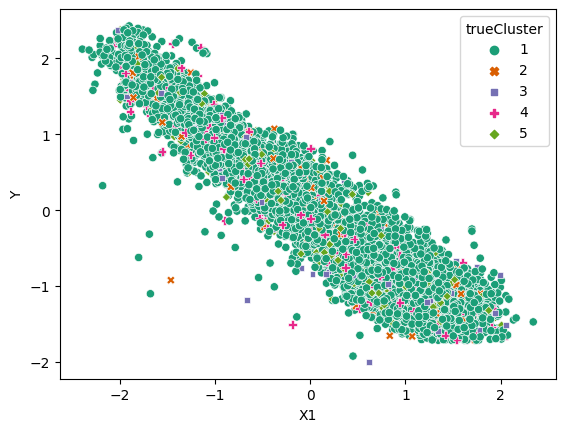

In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.19326033357505304
Best WS is kmlr
Max error for warm starting model:  2.705651491673728
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.04479656 -0.09507367 -0.04303844 -0.10244798]
 [-0.954804   -0.29453629  0.04708646 -0.07427074]
 [-0.72449151 -0.24156014  0.08912792 -0.10523427]
 [-0.62540537 -0.19199697  0.08158005 -0.0925603 ]
 [-0.51678347 -0.16182547  0.09204293 -0.05392417]]
b at WS:  [[-0.05598423]
 [-0.17890925]
 [-0.07549951]
 [-0.17422497]
 [-0.23238701]]
Set parameter TimeLimit to value 1201.2983
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  1.4523750727243545


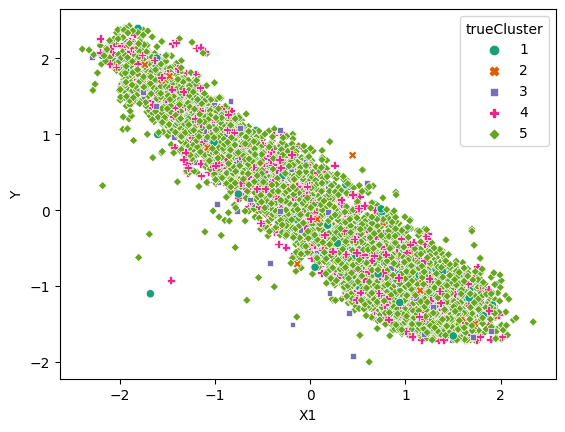

In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 1201.2983
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Powerplant2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Powerplant.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Powerplant.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)



Solution reached with Cost:  1.561297177905872


Results for full MILP
EpsVal for full MILP:  1.561297177905872
Time taken for full MILP  600.9637093460001 

